# Extract data from output files
### Analyze the output from a single LBANN run
March 9, 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import subprocess as sp
import os
import glob
import sys

from scipy import fftpack

In [2]:
sys.path.append('/global/u1/v/vpa/project/jpt_notebooks/Cosmology/Cosmo_GAN/LBANN/lbann_cosmogan/3_analysis/')
from modules_image_analysis import *

[NbConvertApp] Converting notebook modules_image_analysis.ipynb to script
[NbConvertApp] Writing 7864 bytes to modules_image_analysis.py


In [3]:
### Transformation functions for image pixel values
def f_transform(x):
    return 2.*x/(x + 4. + 1e-5) - 1.

def f_invtransform(s):
    return 4.*(1. + s)/(1. - s + 1e-5)

In [4]:
def f_get_samples(images_dict,key):
    '''
    Extract array of samples from the dictionary: images_dict
    Handles the separate cases of _gen images that are of size (:,)
    '''
    
    keys=['train_gen','train_input','val_gen','val_input']
    assert key in keys,"Given key %s is not the the list of keys %s"%(key,keys)
    
    lst=images_dict[key]
    if key.endswith('input'):
        size=np.int(np.sqrt(lst[0].shape[-1])) ### Extract size of images (=128)
        samples=np.array([ii[0,:].reshape(size,size) for ii in lst])
    else : 
        samples=np.array([ii[0,0,:,:] for ii in lst])
    
    return samples

## Extract image data 

In [52]:
fldr_name='20200401_064840_exagan'
main_dir='/global/cfs/cdirs/m3363/vayyar/cosmogan_data/results_data/{0}/dump_outs/'.format(fldr_name)
print(main_dir)

/global/cfs/cdirs/m3363/vayyar/cosmogan_data/results_data/20200401_064840_exagan/dump_outs/


In [53]:
## Get images files and .npy arrays for each image in dump_outs folder
files_dict,images_dict={},{}
keys=['train_gen','train_input','val_gen','val_input']
file_strg_lst=['model0-training*-gen_img*-output0.npy','model0-training*-inp_img*-output0.npy','model0-validation*-gen_img*-output0.npy','model0-validation*-inp_img*-output0.npy']
for key,file_strg in zip(keys,file_strg_lst):
    files_dict[key]=np.array(glob.glob(main_dir+file_strg))
    images_dict[key]=[np.load(fle) for fle in files_dict[key]] 
    ### Deliberately kept as as list because some of the input arrays have different dimensions, causing creation of array of arrays in some cases


## Extract samples 

In [57]:
### Available options : keys=['train_gen','train_input','val_gen','val_input']
samples1=f_get_samples(images_dict,'train_input')
print(samples1.shape)
samples2=f_get_samples(images_dict,'val_gen')
print(samples2.shape)

# samples3=f_get_samples(images_dict,'train_gen')
# print(samples1.shape)
# samples4=f_get_samples(images_dict,'val_input')
# print(samples2.shape)

(240, 128, 128)
(240, 128, 128)


## Compare images

inf

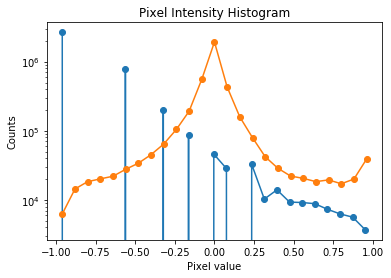

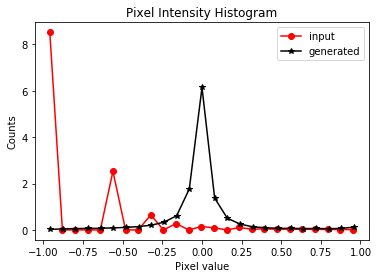

In [58]:
f_pixel_intensity(samples1,normalize=False)
f_pixel_intensity(samples2,normalize=False)

f_compare_pixel_intensity(samples1,samples2,label1='input',label2='generated',normalize=True)

# plt.savefig('comparison_intensity.png')

In [ ]:
# f_pixel_intensity(f_invtransform(samples1),normalize=False)
# f_pixel_intensity(f_invtransform(samples2),normalize=False)

(479, 128, 128) (54, 128, 128) (479, 88) (54, 88)
(88,) (88,)


7154446.859119363

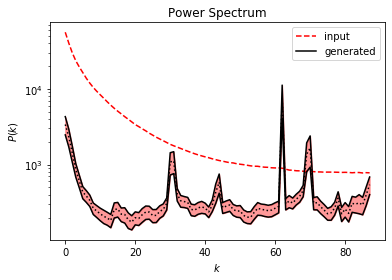

In [10]:
f_compare_spectrum(samples1,samples2,label1='input',label2='generated')
# ? f_compare_spectrum

## Inspect individual sample arrays

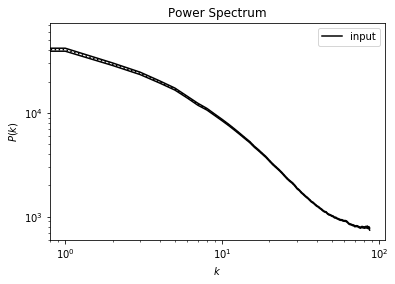

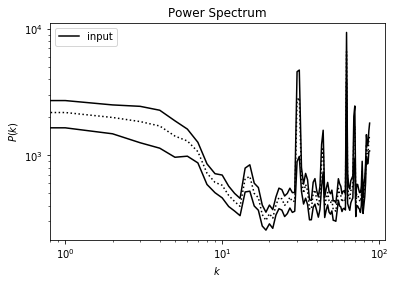

In [13]:
f_compute_spectrum(samples1)
f_compute_spectrum(samples2)

In [8]:
1700/64 

26.5625